In [1]:
import numpy as np
import pandas as pd

#dataset import
dataset = pd.read_csv("train.csv") 
dataset.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [56]:
#načítanie dát pomocou pandas knižnice
X = dataset.iloc[:,:20].values #informácie o zariadení okrem cenovej skupiny
y = dataset.iloc[:,20:21].values #posledný stĺpec, cenová skupina
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X = sc.fit_transform(X) #úprava údajov na štandardizovanú hodnotu.
X

array([[-1.73031962, -0.47545131,  0.968496  , ..., -1.65335542,
        -1.76021608,  1.        ],
       [-1.72685552, -0.94278218,  0.968496  , ..., -0.74341848,
         0.56811207, -1.        ],
       [-1.72339142,  1.29207729,  0.968496  , ..., -0.19745632,
        -1.76021608,  1.        ],
       ...,
       [ 1.72339142, -0.1469316 , -1.03252879, ...,  0.53049324,
         0.56811207, -1.        ],
       [ 1.72685552,  0.65817305,  0.968496  , ..., -0.92540587,
        -1.76021608,  1.        ],
       [ 1.73031962,  0.04971753,  0.968496  , ..., -1.47136804,
         0.56811207, -1.        ]])

In [3]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(categories='auto') #import OHN
y = ohe.fit_transform(y).toarray() # premenenie hodnôt y z int na bool array
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [4]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1) # rozdelenie dát na train,test pre X y. test_size urcite podiel training(90%) a test (10%)

In [5]:
import keras # import neurónovej sieti Keras
from keras.models import Sequential #import sekvenčného modelu 
from keras.layers import Dense #Dense (plne prepojené) vrstvy , spája všetky input hodnoty s output hudnotamy na každej vrstve

# Neural network
model = Sequential() # sekvenčný model NS
#add 2 skryté vrstvy o 20 a 12 dimenzií Dense(20,...) a Dense(12,...)
model.add(Dense(20, input_dim=20, activation="relu")) # určuje vstupnú dimenziu 20 (dáta) a aktivačnú funkciu relu
model.add(Dense(12, activation="relu")) # podobne určuje vrstvu s 12 dimenziami, keďže ide o sekvenčný model Kerasu, automaticky ho prevezme z 1.
model.add(Dense(4, activation="softmax")) # output je nastaveny na 4, pretože cenové dĺžky sú od 1 po 4, teda 4 objekty na klasifikovanie
model.summary()
# softmax je aktivačná funkcia ktorá berie výstup poslednej vrstvy viactriednej klasifikačnej neurónovej sieti
#vezme exponenty každého výstupu a potom normalizuje každé číslo súčtom týchto exponentov, takže celý výstupný vektor sa bude rovnať 1 - všetky pravdepodobnosti by sa mali po súčte rovnať 1

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 724
Trainable params: 724
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam je optimalizačný algoritmus, ktorý sa dá použiť na aktualizáciu iteratívnych váh v sieti na základe trénovacích dát.
#Metrics určuje na základe čoho sa bude presnosť siete merať 

In [7]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=110, batch_size=100)
# na preprivpravený model sa zavolá funkcia fit ktorá berie ako vstupné parametre dáta z datasetu, epochs = počet iterácií a batch_size kt predstavuje aké množstvo údajov sa spracováva naraz. 

Train on 1800 samples, validate on 200 samples
Epoch 1/110
1800/1800 [==============================] - 1s 496us/step - loss: 1.5537 - accuracy: 0.2611 - val_loss: 1.5173 - val_accuracy: 0.2200
Epoch 2/110
1800/1800 [==============================] - 0s 66us/step - loss: 1.4612 - accuracy: 0.2717 - val_loss: 1.4485 - val_accuracy: 0.2100
Epoch 3/110
1800/1800 [==============================] - 0s 72us/step - loss: 1.3954 - accuracy: 0.2917 - val_loss: 1.3981 - val_accuracy: 0.2100
Epoch 4/110
1800/1800 [==============================] - 0s 63us/step - loss: 1.3424 - accuracy: 0.3206 - val_loss: 1.3552 - val_accuracy: 0.2700
Epoch 5/110
1800/1800 [==============================] - 0s 68us/step - loss: 1.2929 - accuracy: 0.3544 - val_loss: 1.3097 - val_accuracy: 0.3050
Epoch 6/110
1800/1800 [==============================] - 0s 64us/step - loss: 1.2411 - accuracy: 0.4050 - val_loss: 1.2624 - val_accuracy: 0.4050
Epoch 7/110
1800/1800 [==============================] - 0s 90us/step - loss

1800/1800 [==============================] - 0s 73us/step - loss: 0.1241 - accuracy: 0.9650 - val_loss: 0.2225 - val_accuracy: 0.9100
Epoch 57/110
1800/1800 [==============================] - 0s 62us/step - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.2222 - val_accuracy: 0.9100
Epoch 58/110
1800/1800 [==============================] - 0s 66us/step - loss: 0.1175 - accuracy: 0.9672 - val_loss: 0.2218 - val_accuracy: 0.9150
Epoch 59/110
1800/1800 [==============================] - 0s 66us/step - loss: 0.1151 - accuracy: 0.9706 - val_loss: 0.2189 - val_accuracy: 0.9200
Epoch 60/110
1800/1800 [==============================] - 0s 73us/step - loss: 0.1125 - accuracy: 0.9717 - val_loss: 0.2150 - val_accuracy: 0.9150
Epoch 61/110
1800/1800 [==============================] - 0s 65us/step - loss: 0.1101 - accuracy: 0.9706 - val_loss: 0.2168 - val_accuracy: 0.9150
Epoch 62/110
1800/1800 [==============================] - 0s 62us/step - loss: 0.1085 - accuracy: 0.9717 - val_loss: 0.2130 - val_a

In [8]:
y_pred = model.predict(X_test)
#vygeneruje predikcie na zaklade vstupnych dat
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty (teda prekonvertuje na int z OHT)
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [9]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť(%):", a*100)

Presnosť(%): 92.0


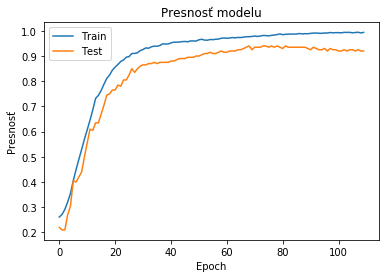

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Presnosť modelu")
plt.ylabel("Presnosť")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

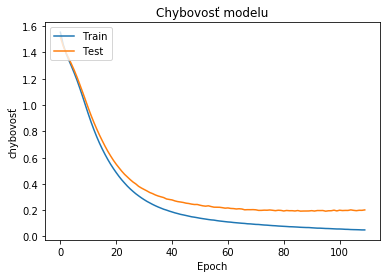

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chybovosť modelu')
plt.ylabel('chybovosť')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()